In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("C:/msys64/home/for/10th/standard/LinearBNB/2025_Airbnb_NYC_listings.csv")
df.T


0      \
Unnamed: 0                                                                                    0   
id                                                                                        36121   
source                                                                              city scrape   
name                                                         Lg Rm in Historic Prospect Heights   
description                                   Cozy space share in the heart of a great neigh...   
...                                                                                         ...   
calculated_host_listings_count                                                                1   
calculated_host_listings_count_entire_homes                                                   0   
calculated_host_listings_count_private_rooms                                                  1   
calculated_host_listings_count_shared_rooms                                                   0   
reviews_per_month                                                                          0.05   

                                                                                          1      \
Unnamed: 0                                                                                    1   
id                                                                                        36647   
source                                                                              city scrape   
name                                          1 Bedroom & your own Bathroom, Elevator Apartment   
description                                   Private bedroom with your own bathroom in a 2 ...   
...                                                                                         ...   
calculated_host_listings_count                                                                1   
calculated_host_listings_count_entire_homes                                                   0   
calculated_host_listings_count_private_rooms                                                  1   
calculated_host_listings_count_shared_rooms                                                   0   
reviews_per_month                                                                          0.58   

                                                                                          2      \
Unnamed: 0                                                                                    2   
id                                                                                        38663   
source                                                                              city scrape   
name                                                           Luxury Brownstone in Boerum Hill   
description                                   Beautiful, large home in great hipster neighbo...   
...                                                                                         ...   
calculated_host_listings_count                                                                1   
calculated_host_listings_count_entire_homes                                                   0   
calculated_host_listings_count_private_rooms                                                  1   
calculated_host_listings_count_shared_rooms                                                   0   
reviews_per_month                                                                          0.28   

                                                                                          3      \
Unnamed: 0                                                                                    3   
id                                                                                        38833   
source                                                                              city scrape   
name                                                         Spectacular West Harlem Garden Apt   
description                 

In [2]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

df.isnull().sum()
# max(df.count(axis = 1))

Unnamed: 0                                         0
id                                                 0
source                                             0
name                                               0
description                                      405
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               6798
Length: 73, dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22308 entries, 0 to 22307
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    22308 non-null  int64  
 1   id                                            22308 non-null  int64  
 2   source                                        22308 non-null  object 
 3   name                                          22308 non-null  object 
 4   description                                   21903 non-null  object 
 5   neighborhood_overview                         12262 non-null  object 
 6   host_id                                       22308 non-null  int64  
 7   host_name                                     22288 non-null  object 
 8   host_since                                    22288 non-null  object 
 9   host_location                                 17025 non-null 

In [4]:
df['host_listings_count']
# 22296       2.0
# 22297       6.0
# 22298       6.0
# 22299       6.0
# 22300       6.0
# 22301       1.0
# 22302       4.0
# 22303       1.0
# 22304      24.0
# 22305     619.0
# 22306      26.0
# 22307      24.0

0          1.0
1          1.0
2          1.0
3          1.0
4          2.0
         ...  
22303      1.0
22304     24.0
22305    619.0
22306     26.0
22307     24.0
Name: host_listings_count, Length: 22308, dtype: float64

In [5]:
df['host_total_listings_count']
# 0           3.0
# 1           1.0
# 2           3.0
# 3           1.0
# 4           2.0
# 5           2.0
# 6           1.0
# 7           2.0
# 8           6.0
# 9           2.0
# 10          4.0
# 11          3.0
# 12          3.0
# 13          1.0



0           3.0
1           1.0
2           3.0
3           1.0
4           2.0
          ...  
22303       2.0
22304      33.0
22305    1974.0
22306      38.0
22307      33.0
Name: host_total_listings_count, Length: 22308, dtype: float64

In [6]:
location = df[['host_id', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 
             'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_identity_verified'
             , 'calculated_host_listings_count']]
location.head()

host_id host_name  host_since host_location  host_response_time  \
0    62165   Michael  2009-12-11  New York, NY                 NaN   
1   157798     Irene  2010-07-04  New York, NY                 NaN   
2   165789     Sarah  2010-07-13  New York, NY  within a few hours   
3   166532   Matthew  2010-07-14  New York, NY      within an hour   
4   168525   Gustavo  2010-07-16  New York, NY      within an hour   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                NaN                  NaN                 f   
1                NaN                 100%                 f   
2               100%                  40%                 f   
3               100%                  97%                 t   
4               100%                 100%                 t   

   host_listings_count host_identity_verified  calculated_host_listings_count  
0                  1.0                      t                               1  
1                  1.0                      t                               1  
2                  1.0                      t                               1  
3                  1.0                      t                               1  
4                  2.0                      t                               2

In [7]:
# transaction["t_dat"] = pd.to_datetime(transaction["t_dat"]) # t_dat을 datetime타입으로 변환
# transaction["month"] = transaction["t_dat"].dt.strftime("%Y-%m") #월별 컬럼 생성
location["host_since"] = pd.to_datetime(location["host_since"])
location["month"] = location["host_since"].dt.strftime("%Y-%m")
location["month"].sort_values()
# 4626     2008-08
# 552      2008-08
# 9561     2008-08
# 1814     2008-09
# 7118     2008-09
# 1568     2008-09
# 1848     2008-09
# 2740     2008-09
# 2123     2008-09
# 1807     2008-09
# 12167    2008-10
# 43       2008-11

C:\Users\for\AppData\Local\Temp\ipykernel_26216\277094298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location["host_since"] = pd.to_datetime(location["host_since"])
C:\Users\for\AppData\Local\Temp\ipykernel_26216\277094298.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location["month"] = location["host_since"].dt.strftime("%Y-%m")


4626     2008-08
552      2008-08
9561     2008-08
1814     2008-09
7118     2008-09
          ...   
15380        NaN
15758        NaN
19045        NaN
19421        NaN
20749        NaN
Name: month, Length: 22308, dtype: object

month
2016-12    1306408
2022-02     102830
2023-08      87493
2012-08      80076
2017-12      54376
2023-02      49078
2018-07      39409
2015-12      34414
2014-08      24188
2014-10      20397
2015-06      19940
2016-03      18453
Name: calculated_host_listings_count, dtype: int64


<Axes: xlabel='month'>

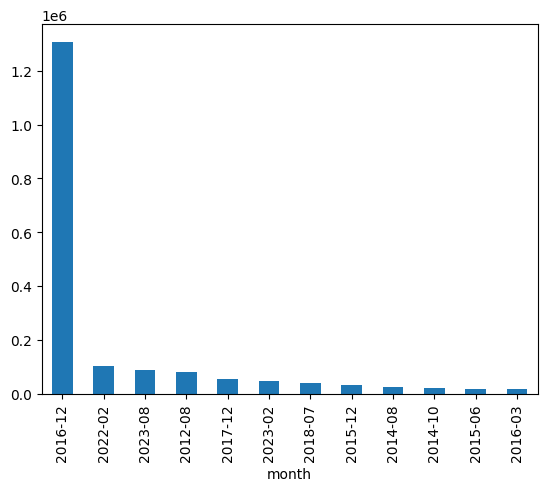

In [8]:
mon2cal = location.groupby('month')['calculated_host_listings_count'].sum()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(mon2cal.sort_values(ascending=False).head(12))
mon2cal.sort_values(ascending=False).head(12).plot(kind = 'bar')


In [9]:
loho = location['host_id'].nunique()
lomo = location.groupby('month')['host_id'].nunique()
lomo.loc['2016-01' : '2016-12']



# lomo.sort_values(ascending = False)
# 2016-05    124
# 2016-08    118
# 2015-07    115
# 2014-07    112
# 2015-08    112
# 2015-06    108
# 2014-08    106

month
2016-01     94
2016-02    102
2016-03     98
2016-04     84
2016-05    124
2016-06    103
2016-07    101
2016-08    118
2016-09     70
2016-10     64
2016-11     64
2016-12     57
Name: host_id, dtype: int64

In [10]:
location['host_location'].nunique()
location['host_location']

0                             New York, NY
1                             New York, NY
2                             New York, NY
3                             New York, NY
4                             New York, NY
5             Saint-Aubin-sur-Scie, France
6                             New York, NY
7                             New York, NY
8                             New York, NY
9                             New York, NY
10                            New York, NY
11                            New York, NY
12                            New York, NY
13                            New York, NY
14                            New York, NY
15                            New York, NY
16                            New York, NY
17                           United States
18                            New York, NY
19                            New York, NY
20                             Atlanta, GA
21                            New York, NY
22                            New York, NY
23         

In [11]:
df['property_type']

0               Private room in rental unit
1                     Private room in condo
2                      Private room in home
3                               Entire home
4               Private room in rental unit
5               Private room in rental unit
6                        Entire rental unit
7                     Private room in condo
8               Private room in rental unit
9               Private room in guest suite
10                             Entire place
11                              Entire loft
12                              Entire loft
13                       Entire rental unit
14                    Private room in condo
15                       Entire rental unit
16              Private room in rental unit
17                             Entire condo
18                              Entire loft
19                Private room in townhouse
20                       Entire rental unit
21                     Private room in home
22                       Entire 

In [12]:
df['neighbourhood']

0        Neighborhood highlights
1        Neighborhood highlights
2        Neighborhood highlights
3        Neighborhood highlights
4        Neighborhood highlights
5                            NaN
6                            NaN
7        Neighborhood highlights
8        Neighborhood highlights
9        Neighborhood highlights
10       Neighborhood highlights
11                           NaN
12                           NaN
13       Neighborhood highlights
14                           NaN
15       Neighborhood highlights
16       Neighborhood highlights
17                           NaN
18       Neighborhood highlights
19       Neighborhood highlights
20                           NaN
21       Neighborhood highlights
22       Neighborhood highlights
23       Neighborhood highlights
24       Neighborhood highlights
25       Neighborhood highlights
26                           NaN
27       Neighborhood highlights
28       Neighborhood highlights
29       Neighborhood highlights
30        

In [13]:
df['price1'] = df['price'].str.split('$').str[1].str.strip().str.replace(',', '').astype('float')

df['price1']

0          200.0
1           82.0
2          765.0
3          139.0
4          130.0
5          139.0
6           96.0
7           59.0
8           67.0
9          195.0
10         290.0
11         216.0
12         165.0
13         150.0
14         171.0
15         150.0
16          62.0
17         100.0
18         563.0
19         185.0
20         165.0
21         110.0
22          77.0
23         175.0
24          90.0
25         110.0
26         115.0
27         169.0
28          97.0
29         109.0
30         534.0
31          60.0
32          97.0
33         260.0
34         114.0
35          81.0
36         161.0
37         175.0
38          95.0
39          60.0
40          57.0
41          85.0
42          95.0
43         136.0
44         300.0
45         230.0
46          70.0
47         150.0
48         200.0
49          94.0
50         153.0
51         117.0
52         110.0
53          90.0
54          99.0
55         156.0
56         266.0
57         223.0
58         298

In [14]:
df['review_scores_rating']

0        4.88
1        4.77
2        4.70
3        4.85
4        4.82
5        4.86
6        4.58
7        5.00
8        4.88
9        4.89
10       4.91
11       4.77
12       4.72
13       4.87
14       5.00
15       4.81
16       4.69
17       4.94
18       4.80
19       4.66
20       5.00
21       4.69
22       4.64
23       4.52
24       4.66
25       4.55
26       4.82
27       4.59
28       4.86
29       4.80
30       4.42
31        NaN
32       4.66
33       4.72
34       4.93
35       4.87
36       4.89
37       4.76
38       4.63
39       4.75
40       4.76
41       4.72
42       4.44
43       4.73
44       4.85
45       4.80
46       4.41
47       4.95
48       4.63
49       4.69
50       4.97
51       4.34
52       4.63
53       4.82
54       4.86
55       4.82
56       4.87
57       4.00
58       4.71
59        NaN
60       4.78
61       4.66
62       4.87
63       4.97
64       4.71
65       4.75
66       4.83
67       4.93
68       4.85
69       4.85
70       4.66
71    

In [15]:
df['review_scores_rating']
df['review'] = df['review_scores_rating'].floordiv(1).astype('Int64')
df['review']

# df.groupby('review')['price'].sum()

0           4
1           4
2           4
3           4
4           4
5           4
6           4
7           5
8           4
9           4
10          4
11          4
12          4
13          4
14          5
15          4
16          4
17          4
18          4
19          4
20          5
21          4
22          4
23          4
24          4
25          4
26          4
27          4
28          4
29          4
30          4
31       <NA>
32          4
33          4
34          4
35          4
36          4
37          4
38          4
39          4
40          4
41          4
42          4
43          4
44          4
45          4
46          4
47          4
48          4
49          4
50          4
51          4
52          4
53          4
54          4
55          4
56          4
57          4
58          4
59       <NA>
60          4
61          4
62          4
63          4
64          4
65          4
66          4
67          4
68          4
69          4
70          4
71    

In [16]:
df.groupby('review')['price1'].mean()

review
1    168.476190
2    144.085366
3    154.996825
4    171.406138
5    209.833738
Name: price1, dtype: float64

In [ ]:
df